<a href="https://colab.research.google.com/github/beyzoskaya/machineLearning_CS454/blob/main/exercises/StockForecastLSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn

In [3]:
data = pd.read_csv('AMZN.csv')
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,1997-05-15,0.121875,0.125000,0.096354,0.097917,0.097917,1443120000
1,1997-05-16,0.098438,0.098958,0.085417,0.086458,0.086458,294000000
2,1997-05-19,0.088021,0.088542,0.081250,0.085417,0.085417,122136000
3,1997-05-20,0.086458,0.087500,0.081771,0.081771,0.081771,109344000
4,1997-05-21,0.081771,0.082292,0.068750,0.071354,0.071354,377064000
...,...,...,...,...,...,...,...
6511,2023-03-30,101.550003,103.040001,101.010002,102.000000,102.000000,53633400
6512,2023-03-31,102.160004,103.489998,101.949997,103.290001,103.290001,56704300
6513,2023-04-03,102.300003,103.290001,101.430000,102.410004,102.410004,41135700
6514,2023-04-04,102.750000,104.199997,102.110001,103.949997,103.949997,48662500


In [6]:
data = data[['Date', 'Close']] # for forecasting, closing value is enough
data

,Date,Close
0,1997-05-15,0.097917
1,1997-05-16,0.086458
2,1997-05-19,0.085417
3,1997-05-20,0.081771
4,1997-05-21,0.071354
...,...,...
6511,2023-03-30,102.000000
6512,2023-03-31,103.290001
6513,2023-04-03,102.410004
6514,2023-04-04,103.949997


In [7]:
device = 'cuda:0' if torch.cuda.is_available() else 'cpu'
device

'cpu'

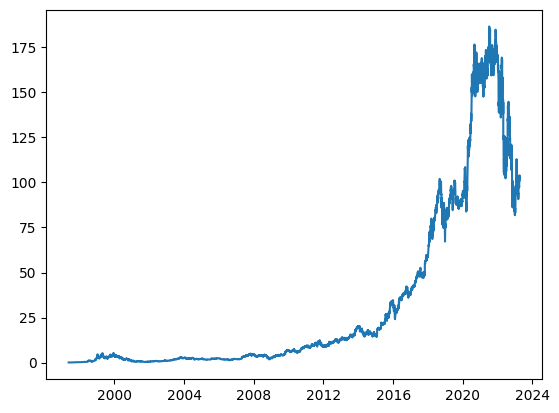

In [8]:
data['Date'] = pd.to_datetime(data['Date'])

plt.plot(data['Date'], data['Close'])

In [16]:
from copy import deepcopy as dc

def prepare_dataframe_for_lstm(df, n_steps):
  df = dc(df)
  #print(df)

  #df['Date'] = pd.to_datetime(df['Date'])
  df.set_index('Date', inplace=True)

  for i in range(1, n_steps+1):
    df[f'Close(t-{i})'] = df['Close'].shift(i)

  df.dropna(inplace=True)
  return df

In [18]:
lookback = 7 # how many days needed to forecast that days closing price
shifted_df = prepare_dataframe_for_lstm(data,lookback)
shifted_df

,Close,Close(t-1),Close(t-2),Close(t-3),Close(t-4),Close(t-5),Close(t-6),Close(t-7)
Date,,,,,,,,
1997-05-27,0.079167,0.075000,0.069792,0.071354,0.081771,0.085417,0.086458,0.097917
1997-05-28,0.076563,0.079167,0.075000,0.069792,0.071354,0.081771,0.085417,0.086458
1997-05-29,0.075260,0.076563,0.079167,0.075000,0.069792,0.071354,0.081771,0.085417
1997-05-30,0.075000,0.075260,0.076563,0.079167,0.075000,0.069792,0.071354,0.081771
1997-06-02,0.075521,0.075000,0.075260,0.076563,0.079167,0.075000,0.069792,0.071354
...,...,...,...,...,...,...,...,...
2023-03-30,102.000000,100.250000,97.239998,98.040001,98.129997,98.709999,98.699997,100.610001
2023-03-31,103.290001,102.000000,100.250000,97.239998,98.040001,98.129997,98.709999,98.699997
2023-04-03,102.410004,103.290001,102.000000,100.250000,97.239998,98.040001,98.129997,98.709999


In [24]:
x = dc(np.flip(x,axis=1))
x

array([[-0.99969839, -0.99982128, -0.99983244, ..., -0.99998325,
        -1.        , -0.99995531],
       [-0.99982128, -0.99983244, -0.99987154, ..., -1.        ,
        -0.99994415, -0.99991063],
       [-0.99983244, -0.99987154, -0.99998325, ..., -0.99994415,
        -0.99989946, -0.99993855],
       ...,
       [ 0.05779984,  0.05158   ,  0.0506149 , ...,  0.07431453,
         0.09308121,  0.10690997],
       [ 0.05158   ,  0.0506149 ,  0.04203581, ...,  0.09308121,
         0.10691495,  0.09747299],
       [ 0.0506149 ,  0.04203581,  0.07431453, ...,  0.10691495,
         0.09747802,  0.11398769]])

In [27]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(-1,1)) # convert all values between -1 and 1
shifted_df_as_np = scaler.fit_transform(shifted_df)

shifted_df_as_np = dc(np.flip(shifted_df_as_np, axis=1))
shifted_df_as_np

array([[-0.99969839, -0.99982128, -0.99983244, ..., -1.        ,
        -0.99995531, -0.99991063],
       [-0.99982128, -0.99983244, -0.99987154, ..., -0.99994415,
        -0.99991063, -0.99993855],
       [-0.99983244, -0.99987154, -0.99998325, ..., -0.99989946,
        -0.99993855, -0.99995253],
       ...,
       [ 0.05779984,  0.05158   ,  0.0506149 , ...,  0.09308121,
         0.10690997,  0.09747299],
       [ 0.05158   ,  0.0506149 ,  0.04203581, ...,  0.10691495,
         0.09747299,  0.11398769],
       [ 0.0506149 ,  0.04203581,  0.07431453, ...,  0.09747802,
         0.11398769,  0.08342464]])

In [28]:
x = shifted_df_as_np[:,1:]
y = shifted_df_as_np[:,0]

x.shape, y.shape

((6509, 7), (6509,))

In [29]:
split_index = int(len(x) * 0.95)
split_index

6183

In [31]:
x_train = x[:split_index]
x_test = x[split_index:]

y_train = y[:split_index]
y_test = y[split_index:]

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((6183, 7), (326, 7), (6183,), (326,))

In [32]:
# adding extra dimension as lstm requirement
x_train = x_train.reshape((-1, lookback, 1))
x_test = x_test.reshape((-1, lookback, 1))

y_train = y_train.reshape((-1,1))
y_test = y_test.reshape((-1,1))

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((6183, 7, 1), (326, 7, 1), (6183, 1), (326, 1))

In [33]:
# all the values are numpy objects but need to convert to tensors to use pytorch
x_train = torch.tensor(x_train).float()
y_train = torch.tensor(y_train).float()
x_test = torch.tensor(x_test).float()
y_test = torch.tensor(y_test).float()

x_train.shape, x_test.shape, y_train.shape, y_test.shape

(torch.Size([6183, 7, 1]),
 torch.Size([326, 7, 1]),
 torch.Size([6183, 1]),
 torch.Size([326, 1]))

In [34]:
from torch.utils.data import Dataset

class TimeSeriesDataset(Dataset):

  def __init__(self, x, y):
    self.x = x
    self.y = y

  def __len__(self):
    return len(self.x)

  def __getitem__(self, index):
    return self.x[index], self.y[index]


In [35]:
train_dataset = TimeSeriesDataset(x_train,y_train)
test_dataset = TimeSeriesDataset(x_test, y_test)

In [36]:
train_dataset

In [37]:
from torch.utils.data import DataLoader

batch_size = 16
train_loader = DataLoader(train_dataset,batch_size=batch_size,shuffle=True)
test_loader = DataLoader(test_dataset,batch_size=batch_size,shuffle=False)

In [39]:
for _,batch in enumerate(train_loader):
  x_batch, y_batch = batch[0].to(device), batch[1].to(device)
  print(x_batch.shape, y_batch.shape)
  break
# for each batch, one output

torch.Size([16, 7, 1]) torch.Size([16, 1])


In [41]:
class LSTM(nn.Module):
  def __init__(self, input_size, hidden_size, num_stacked_layers):
    super().__init__()
    self.hidden_size = hidden_size
    self.num_stacked_layers = num_stacked_layers
    self.lstm = nn.LSTM(input_size=input_size,
                        hidden_size=hidden_size,
                        num_layers=num_stacked_layers,
                        batch_first=True)

    self.fc = nn.Linear(hidden_size,1)

  def forward(self,x):
    batch_size = x.size(0)
    h0 = torch.zeros(self.num_stacked_layers, batch_size, self.hidden_size).to(device)
    c0 = torch.zeros(self.num_stacked_layers, batch_size, self.hidden_size).to(device)
    out,_ = self.lstm(x,(h0,c0))
    out = self.fc(out[:,-1,:])
    return out

model = LSTM(1,4,1)
model.to(device)
model

LSTM(
  (lstm): LSTM(1, 4, batch_first=True)
  (fc): Linear(in_features=4, out_features=1, bias=True)
)

In [47]:
def train_one_epoch():
  model.train(True)
  print(f'Epoch: {epoch + 1}')
  running_loss = 0.0

  for batch_index, batch in enumerate(train_loader):
    x_batch, y_batch = batch[0].to(device), batch[1].to(device)

    output = model(x_batch)
    loss = loss_function(output, y_batch)
    running_loss += loss
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if batch_index % 100 == 99:
      avg_loss_across_batches = running_loss / 100
      print('Batch{0}, Loss: {1:.3f}'.format(batch_index+1, avg_loss_across_batches))

      running_loss = 0.0


  print()

In [48]:
def validate_one_epoch():
  model.train(False)
  #model.eval()
  running_loss = 0.0

  for batch_index, batch in enumerate(test_loader):
    x_batch, y_batch = batch[0].to(device), batch[1].to(device)

    with torch.no_grad():
      output = model(x_batch)
      loss = loss_function(output, y_batch)
      running_loss += loss

  avg_loss_across_batches = running_loss / len(test_loader)

  print('Val Loss: {0:.3f}'.format(avg_loss_across_batches))
  print('****************************************************')
  print()

In [49]:
learning_rate = 0.001
num_epochs = 10
loss_function = nn.MSELoss() # regression problem so loss is Mean Square for continuity
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

for epoch in range(num_epochs):
  train_one_epoch()
  validate_one_epoch()

Epoch: 1
Batch100, Loss: 0.170
Batch200, Loss: 0.068
Batch300, Loss: 0.024

Val Loss: 0.040
****************************************************

Epoch: 2
Batch100, Loss: 0.008
Batch200, Loss: 0.007
Batch300, Loss: 0.004

Val Loss: 0.012
****************************************************

Epoch: 3
Batch100, Loss: 0.003
Batch200, Loss: 0.002
Batch300, Loss: 0.002

Val Loss: 0.010
****************************************************

Epoch: 4
Batch100, Loss: 0.002
Batch200, Loss: 0.002
Batch300, Loss: 0.001

Val Loss: 0.008
****************************************************

Epoch: 5
Batch100, Loss: 0.001
Batch200, Loss: 0.001
Batch300, Loss: 0.001

Val Loss: 0.007
****************************************************

Epoch: 6
Batch100, Loss: 0.001
Batch200, Loss: 0.001
Batch300, Loss: 0.001

Val Loss: 0.007
****************************************************

Epoch: 7
Batch100, Loss: 0.001
Batch200, Loss: 0.001
Batch300, Loss: 0.001

Val Loss: 0.006
********************************

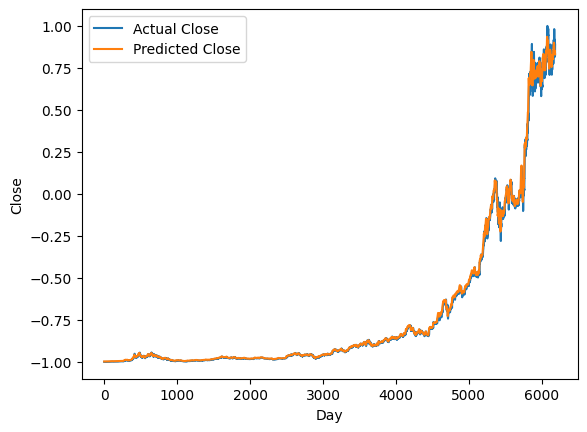

In [50]:
with torch.no_grad():
  predicted = model(x_train.to(device)).to('cpu').numpy() # numpy does not use gpu--> must convert to use numpy as cpu

plt.plot(y_train, label='Actual Close')
plt.plot(predicted, label='Predicted Close')
plt.xlabel('Day')
plt.ylabel('Close')
plt.legend()
plt.show()

In [51]:
train_predictions = predicted.flatten()

dummies = np.zeros((x_train.shape[0], lookback+1))
dummies[:,0] = train_predictions
dummies = scaler.inverse_transform(dummies)

train_predictions = dc(dummies[:,0])
train_predictions

array([  0.32477253,   0.32398327,   0.32323849, ..., 171.32428648,
       171.62364699, 170.80101142])

In [52]:
dummies = np.zeros((x_train.shape[0], lookback+1))
dummies[:,0] = y_train.flatten()
dummies = scaler.inverse_transform(dummies)

new_y_train = dc(dummies[:,0])
new_y_train

array([9.89571028e-02, 8.74962530e-02, 8.64568840e-02, ...,
       1.69489600e+02, 1.71368585e+02, 1.76164561e+02])

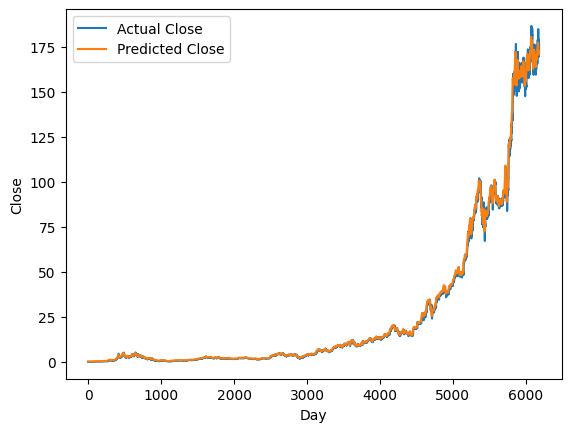

In [53]:
plt.plot(new_y_train, label='Actual Close')
plt.plot(train_predictions, label='Predicted Close')
plt.xlabel('Day')
plt.ylabel('Close')
plt.legend()
plt.show()